<a href="https://colab.research.google.com/github/Adeelzafar/NLP-Course/blob/main/Uplimit_Week1_LectureNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is part of the course: [Building AI products with OpenAI](https://corise.com/go/building-ai-products-with-openai-MWKY3) and is created by Sidharth Ramachandran as part of the Lecture session for this course.

# Working with the OpenAI API

Welcome to the lecture notebook that is part of the course - **Building AI products with OpenAI**. In this notebook, we show you some basic aspects of working with the OpenAI ecosystem using a web interface (Playground) and directly with the API. This is meant as a way to familiarize yourself with the OpenAI ecosystem so that you can make faster progress in the project section. Please also refer to the content on the CoRise platform that provides more detailed information and background into the various aspects of the OpenAI ecosystem.

# Demo of OpenAI Playground

In order to use OpenAI APIs, please create an account with OpenAI by visiting this [link](https://platform.openai.com/) and creating an account with a login of your choice. This will allow you to access the API - different from the ChatGPT front-end application. Note that when you create a completely new account, you will recieve $5 of credit which should be enough for the purposes of this project.

Once you have created the account, please navigate to the Playground page as shown in the screenshot below -

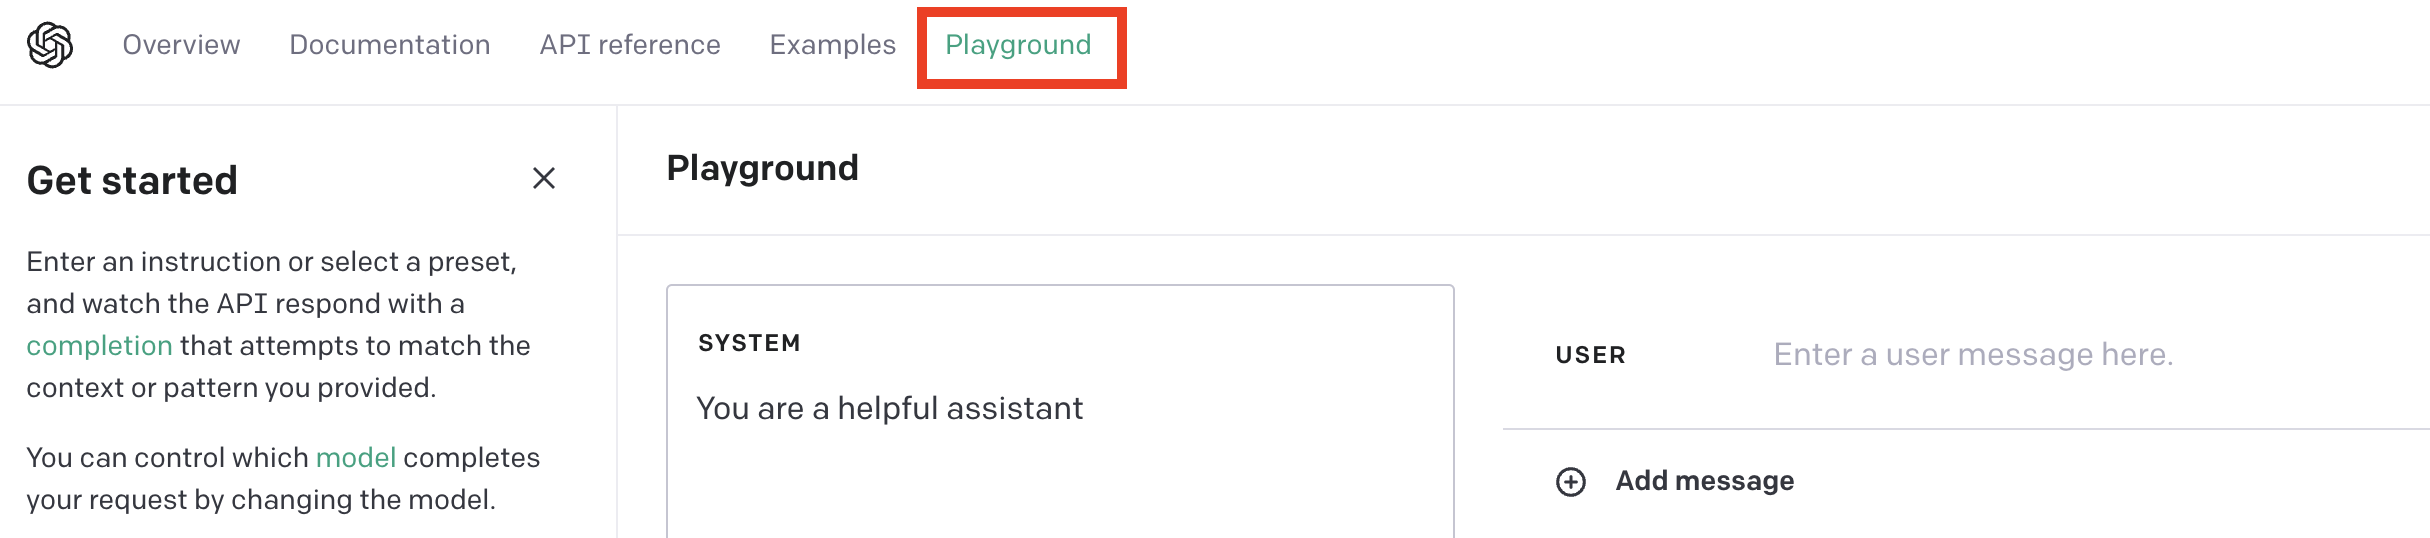

Further details on how to use Playground will be shown during the Lecture session and will focus on the following aspects -

- How to use GPT-3.5 with the System, User and Assistant messages -> this is what we will also use in the project section of this course
- Check the use of text-davinci-003 using Playground -> this works only with the text completion API which will soon be deprecated but it helps to serve as an example of where the journey started
- Briefly check the use of Curie, Babbage and Ada models using Playground

# Making API calls to OpenAI

Before using the OpenAI API, you need to get an API token. You can login to the same account that you created in the previous step and navigate to the `Manage Accounts` section of your profile and look-up the `Usage` tab. By default, most new accounts automatically get \$5 of credit to try the API and this should be enough for the purposes of this project. If you notice that you do not have any credits, this could be because the email or phone number associated with your account was already activated earlier or that your credits have expired. In this case, you might need to setup a payment method to start using the API. We do not expect costs with this project to exceed \$5.

After that, please visit the `API Keys` tab and Create a new secret key and copy this and keep it available. We will use this API key in subsequent steps while making the API calls.

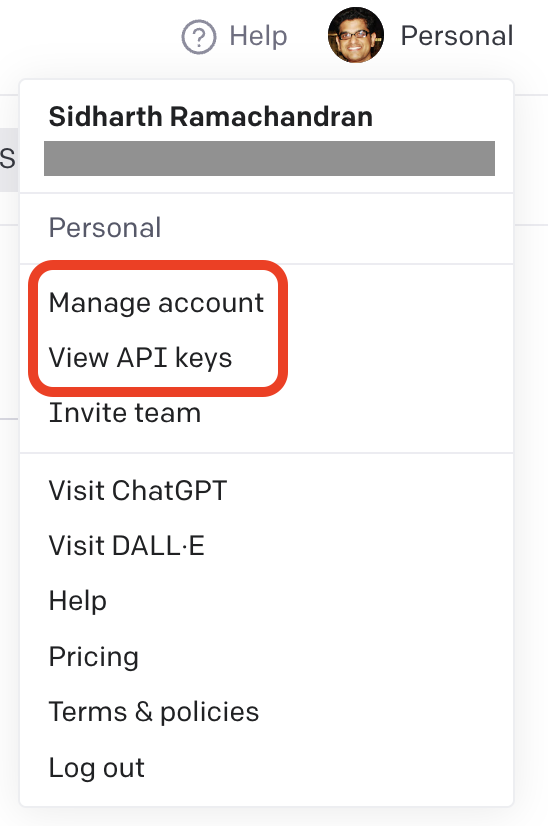

We need to install the `openai` library which is the Python package that allows us to make calls to the API. While we can use the API and make calls directly, it's much easier to work with the Python library provided by OpenAI called - `openai` 🤭.

In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 1.2 MB/s eta 0:00:00


Running the below cell will create an input text box where you need to paste the OpenAI key that you saved previously.

In [ ]:
import openai
from getpass import getpass

openai.api_key = getpass('Enter the OpenAI API Key in the cell ')

Enter the OpenAI API Key in the cell ··········


In the demo you would have already observed how to use the Playground web interface to interact with the model. The following sections of code are meant to replicate the same process programmatically.

# Predicting sentiment of Amazon Product Reviews

In order to understand how to work with the API, we will try to predict the sentiment associated with Amazon product reviews using gpt-3.5-turbo. You can copy-paste reviews from any Amazon product page but I chose to use the dataset from Chapter 11 of my book - [Blueprint for Text Analytics using Python](https://www.oreilly.com/library/view/blueprints-for-text/9781492074076/), published by O'Reilly in December 2020. In that chapter, I provided a blueprint for classification using different techniques with the most sophisticated being a fine-tuned BERT model (state-of-the-art at the time) that achieves an accuracy of 95%. Two years later, I want to see how we might go about achieving the same thing with the help of OpenAI APIs.

In [ ]:
!wget -P /content/data/amazon-product-reviews/ https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/master/data/amazon-product-reviews/reviews_5_balanced.json.gz

--2023-08-14 15:20:41--  https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/master/data/amazon-product-reviews/reviews_5_balanced.json.gz
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/blueprints-for-text-analytics-python/blueprints-text/master/data/amazon-product-reviews/reviews_5_balanced.json.gz [following]
--2023-08-14 15:20:42--  https://raw.githubusercontent.com/blueprints-for-text-analytics-python/blueprints-text/master/data/amazon-product-reviews/reviews_5_balanced.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16649530 (16M) [application/octet-stream]


In [ ]:
import pandas as pd

file = "/content/data/amazon-product-reviews/reviews_5_balanced.json.gz"
df = pd.read_json(file, lines=True)
df = df.drop(columns=['reviewTime','unixReviewTime'])
df = df.rename(columns={'reviewText': 'text'})
df.sample(5, random_state=12)

,overall,verified,reviewerID,asin,text,summary
163807,5,False,A2A8GHFXUG1B28,B0045Z4JAI,Good Decaf... it has a good flavour for a deca...,Nice!
195640,5,True,A1VU337W6PKAR3,B00K0TIC56,I could not ask for a better system for my sma...,I could not ask for a better system for my sma...
167820,4,True,A1Z5TT1BBSDLRM,B0012ORBT6,good product at a good price and saves a trip ...,Four Stars
104268,1,False,A4PRXX2G8900X,B005SPI45U,I like the principle of a raw chip - something...,No better alternatives but still tastes bad.
51961,1,True,AYETYLNYDIS2S,B00D1HLUP8,"Fake China knockoff, you get what you pay for.",Definitely not OEM


We make use of the number of stars to act as a proxy for the positive or negative sentiment associated with a review. If a review has greater than 3 stars then we consider that the user was satisfied and expressed a positive sentiment in their review. If a review has less than 3 stars then we assume that the user was not satisfied with their purchase and expressed a negative sentiment in their review. In this way we also ignore those reviews that have 3 stars as they are difficult to classify as either positive or negative.

In [ ]:
# Assigning a new [1,0] target class label based on the product rating
df['sentiment'] = 'OTHER'
df.loc[df['overall'] > 3, 'sentiment'] = 'POSITIVE'
df.loc[df['overall'] < 3, 'sentiment'] = 'NEGATIVE'

# Removing unecessary columns to keep a simple dataframe
df.drop(columns=['overall', 'reviewerID', 'summary'],
        inplace=True)
df.sample(5)

,verified,asin,text,sentiment
105424,True,B00JPSZNCI,Not that good,NEGATIVE
127620,True,B004ZIA4GS,None grew...waste of money!,NEGATIVE
154220,True,B0002VS62G,Labels were great but had software problems wi...,POSITIVE
150952,True,B00R2K4LCY,works good,POSITIVE
102670,True,B01F2PYV20,I am not a fan of these at all I would rather ...,NEGATIVE


# Review classification using a user prompt

We will provide a prompt and ask the LLM to classify a given product review into positive or negative. I retrieve the review from the dataset using the variable `review_number`. Please feel free to try with different values or even better, just replace the review_text variable with the text of any other Amazon product review that you want.

In [ ]:
review_number= 4
review_text = df['text'].iloc[review_number]
print (review_text)

Constantly rolls down


In order to achieve the classification, I need to provide instructions to the model on what I expect it to do. As you can see below, I provide detailed context and information on when a review would be considered positive or negative.

In [ ]:
instructPrompt = f"""
You will be provided with a customer review of a product on an online e-commerce website. You have to understand the context of the review
and classify the sentiment into three categories - POSITIVE or NEGATIVE or OTHER.
POSITIVE - this category indicates that the user was happy with the product and liked it
NEGATIVE - this category indicates that the user was unhappy with the product and did not like it
OTHER - please output this category if you cannot tell what the review is

Only provide the determined category and nothing else. I don't want any explanations.

Review Text: {review_text}

Sentiment:
"""

Let's take a look at what our complete prompt looks like -

In [ ]:
print (instructPrompt)


You will be provided with a customer review of a product on an online e-commerce website. You have to understand the context of the review
and classify the sentiment into three categories - POSITIVE or NEGATIVE or OTHER.
POSITIVE - this category indicates that the user was happy with the product and liked it
NEGATIVE - this category indicates that the user was unhappy with the product and did not like it
OTHER - please output this category if you cannot tell what the review is

Only provide the determined category and nothing else. I don't want any explanations.

Review Text: Constantly rolls down

Sentiment:



The following section makes the call to the API with the prompt that we have just created.

In [ ]:
chatOutput = openai.ChatCompletion.create(model="gpt-3.5-turbo",
                                            messages=[{"role": "system", "content": "You are a helpful assistant."},
                                                      {"role": "user", "content": instructPrompt}
                                                      ]
                                          )

Let's take a look at the predicted sentiment and compare it with what our original prediction based on the number of stars.

In [ ]:
print ('OpenAI Response: ', chatOutput.choices[0].message.content)
print ('Sentiment based on ratings: ', df['sentiment'].iloc[review_number])

OpenAI Response:  NEGATIVE
Sentiment based on ratings:  NEGATIVE


So as we can see, this is a simple call to the API and based on the response you can see that they match as well.

# Review classification using a system prompt

We've seen in the previous section a simple way to use the API. In this section, we will make two changes to the way we call the API -

- We provide the instructions in a system prompt. This is a good way to provide global level instructions to the model which should allow it to maintain consistency throughout the conversation
- We provide multiple examples in the prompt to check if the model is able to respond back with multiple predictions

In [ ]:
# Appending multiple examples of reviews in the user message, leaving a blank for predicted sentiment
user_messages = ''
for review in range(10,15):
  user_messages = user_messages + 'Review Text: ' + df['text'].iloc[review]
  user_messages = user_messages + '\n' + 'Sentiment: '
  user_messages = user_messages + '\n'

In [ ]:
systemPrompt = f"""
You will be provided with a customer review of a product on an online e-commerce website. You have to understand the context of the review
and classify the sentiment into three categories - POSITIVE or NEGATIVE or OTHER.
POSITIVE - this category indicates that the user was happy with the product and liked it
NEGATIVE - this category indicates that the user was unhappy with the product and did not like it
OTHER - please output this category if you cannot tell what the review is

Only provide the determined category and nothing else. I don't want any explanations.
"""

In [ ]:
print ('System Prompt: ', systemPrompt)
print ('Review Observations:\n', user_messages)

System Prompt:  
You will be provided with a customer review of a product on an online e-commerce website. You have to understand the context of the review
and classify the sentiment into three categories - POSITIVE or NEGATIVE or OTHER.
POSITIVE - this category indicates that the user was happy with the product and liked it
NEGATIVE - this category indicates that the user was unhappy with the product and did not like it
OTHER - please output this category if you cannot tell what the review is

Only provide the determined category and nothing else. I don't want any explanations.

Review Observations:
 Review Text: They looked very cheap
Sentiment: 
Review Text: Artculo equivocado en color
Sentiment: 
Review Text: I've always gotten this size in Nike shoes with similar description, but these are too long- at least an inch and 1/2.
Sentiment: 
Review Text: After less than a week the sole ripped off on the outside of the shoe
Sentiment: 
Review Text: wrong shoes
Sentiment: 



In [ ]:
chatOutput = openai.ChatCompletion.create(model="gpt-3.5-turbo",
                                            messages=[{"role": "system", "content": systemPrompt},
                                                      {"role": "user", "content": user_messages}
                                                      ]
                                          )

In [ ]:
print ('OpenAI Response: ', chatOutput.choices[0].message.content)

OpenAI Response:  NEGATIVE
OTHER
OTHER
NEGATIVE
NEGATIVE


As you can see in the above example, we were able to provide the model with multiple examples and it provides a response to each of the observations.

**NOTE**: To be clear, this may not always work and there are instances when the number of observations and predictions will be different. This is due to the relative importance of different sections of the input context window but we will not dive deeper as it is an advanced concept. This also does not play a big role because you are charged based on the number of tokens and not the number of API calls. Therefore it is okay to call the API multiple times for each observation. The limiting factor would of course be in the time penalty of multiple API calls.

# Review classification using function calling


One of the recent introductions to the OpenAI API is function calling. If you notice the prompt that we provided in the previous sections we had to explicitly say the following sentence - "`Only provide the determined category and nothing else. I don't want any explanations."` The reason for this is that chat models tend to be chatty 🥰 and provide additional reasoning and information about why a certain prediction was made. This might be necessary when a human is chatting with the LLM but is not required when we are using the LLM to perform information extraction. More generally, we might want to have the information provided back to us in a structured and rigid form and not as a plain text field.

This is exactly where the function calling capability comes in. It is a way to force the OpenAI API to provide the output in a structured manner. The way we achieve this is by informing the API that we would like to use the output of the model in a further call to a separate function. We provide it with a definition of this function and it then structures the output so that it could be easily used as the input to this function.

**NOTE**: However, please note that this function does not have to actually exist! It is what we provide in the call to the API and whether we choose to use the output to call this function or not is completely up to us.

Let's see how this works in practice.

In [ ]:
review_number= 54
review_text = df['text'].iloc[review_number]
print (review_text)

Made my hair brittle and dull looking, didn't do anything for the itch or dandruff.


What we do is that we remove the systemPrompt that we had defined in the previous step and instead provide a description of a function called `forward_review_using_sentiment`.

- We provide additional information about the functionality of this function - that it is used to forward the customer review to an agent based on whether it is positive or negative.
- In order for this function to work, it needs the mandatory field called `sentiment` based on which it will do the forwarding
- We also provide additional information on what the sentiment field looks like `type:string` and a `description` of what it means
- We also force the model that it needs to call the function by setting the parameter `function_call` to the name of the function. The other attributes are `function_call:none` when you want the model to generate a regular chat message response or `function_call:auto` when you want the model to decide on it's own what it would like to do.

Note that we have not actually defined the function and at the moment we do not intend to use it as a forwarding function. But this is a way to force the model to identify the sentiment and provide the response in a structured JSON format.

In [ ]:
completion = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "user", "content": review_text}],
    functions=[
    {
        "name": "forward_review_using_sentiment",
        "description": "This function forwards the review to an appropriate customer service agent based on whether it is POSITIVE or NEGATIVE.",
        "parameters": {
            "type": "object",
            "properties": {
                "sentiment": {
                    "type": "string",
                    "description": "The sentiment of the review which is POSITIVE if the customer liked the product and is NEGATIVE if the customer did not like the product",
                },
                "unit": {"type": "string"},
            },
            "required": ["sentiment"],
        },
    }
    ],
    function_call={"name": "forward_review_using_sentiment"}
    )

In [ ]:
completion

<OpenAIObject chat.completion id=chatcmpl-7nTgXT2bCGHPL5o9MmrQK6PGjPy2S at 0x7891456a4b30> JSON: {
  "id": "chatcmpl-7nTgXT2bCGHPL5o9MmrQK6PGjPy2S",
  "object": "chat.completion",
  "created": 1692026537,
  "model": "gpt-3.5-turbo-0613",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": null,
        "function_call": {
          "name": "forward_review_using_sentiment",
          "arguments": "{\n  \"sentiment\": \"NEGATIVE\"\n}"
        }
      },
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 127,
    "completion_tokens": 11,
    "total_tokens": 138
  }
}

As you can see in the response, the output is in the form of a structured JSON response. The model has determined that the function `forward_review_using_sentiment` must be called with the argument `sentiment` that has the NEGATIVE value. We can easily parse this JSON response and use it for our purposes.

You can imagine that there might be scenarios where you want the output in a structured format so that you can actually call another function (e.g. a plugin) with the output. We will actually make use of the function_calling capability in the project associated with the course.

Note that this is not the only way to get structured output from the model. You can also explicitly ask it to provide the output in a structured JSON format but this may not work always as expected. In addition, you would also need to provide an example of what this JSON format looks like. The function calling capability was introduced to take care of exactly these kinds of scenarios.